In [28]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os
from pandas.io.json import json_normalize
import pyslha
pd.options.mode.chained_assignment = None #Disable copy warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from test.testCreator import equalObjs

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.3)
cm = plt.cm.get_cmap('RdYlBu')

In [3]:
fileA = pyslha.readSLHAFile('./slha_tests/test_LH1000.slha')
fileB = pyslha.readSLHAFile('./slha_tests/LHT1TeV_juhi.slha')
print(equalObjs(fileA,fileB, rtol=0.05))

WARNING in testCreator.equalObjs(): Data types differ (<class 'float'>,<class 'int'>) at 11/29/2018 02:44:34 PM
WARNING in testCreator.equalObjs(): Dictionaries differ in key totalwidth at 11/29/2018 02:44:34 PM
WARNING in testCreator.equalObjs(): The values are: 1.43515 versus 0 at 11/29/2018 02:44:34 PM
WARNING in testCreator.equalObjs(): Dictionaries differ in key 6 at 11/29/2018 02:44:34 PM
WARNING in testCreator.equalObjs(): The values are: 6 : mass = 172 GeV : total width = 1.44 GeV
   1 [24, 5] versus 6 : mass = 172 GeV : total width = 0 GeV at 11/29/2018 02:44:34 PM
WARNING in testCreator.equalObjs(): Dictionaries differ in key decays at 11/29/2018 02:44:34 PM
WARNING in testCreator.equalObjs(): The values are too long to print. at 11/29/2018 02:44:34 PM


False


In [14]:
xsecA = dict([ [str(proc.pidsfinal).replace('[','').replace(']','').replace(',','_').replace(' ',''),
                   max([x.value for x in proc.get_xsecs(sqrts=13000)])*1000]
                    for proc in fileA.xsections.values() if proc.get_xsecs(sqrts=13000)])  
xsecB= dict([ [str(proc.pidsfinal).replace('[','').replace(']','').replace(',','_').replace(' ',''),
                   max([x.value for x in proc.get_xsecs(sqrts=13000)])*1000]
                    for proc in fileB.xsections.values() if proc.get_xsecs(sqrts=13000)])  


In [15]:
print(equalObjs(xsecA,xsecB, rtol=0.01))
print(equalObjs(xsecA,xsecB, rtol=0.05))
print(equalObjs(xsecA,xsecB, rtol=0.1))

WARNING in testCreator.equalObjs(): Dictionaries differ in key 8880001_8880002 at 11/29/2018 02:52:11 PM
WARNING in testCreator.equalObjs(): The values are: 48.760999999999996 versus 48.14885343 at 11/29/2018 02:52:11 PM
WARNING in testCreator.equalObjs(): Dictionaries differ in key 8880002_8880002 at 11/29/2018 02:52:11 PM
WARNING in testCreator.equalObjs(): The values are: 20.537 versus 22.431639999999998 at 11/29/2018 02:52:11 PM


False
False
True


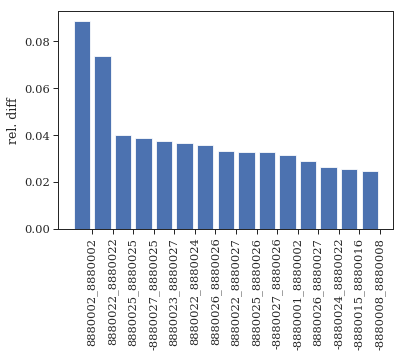

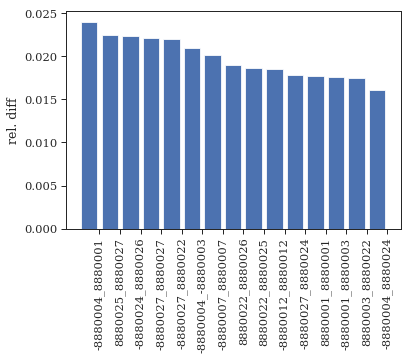

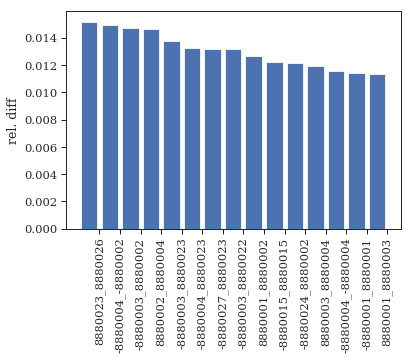

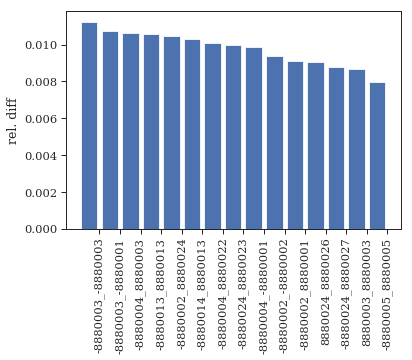

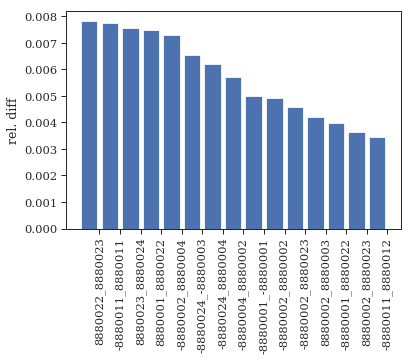

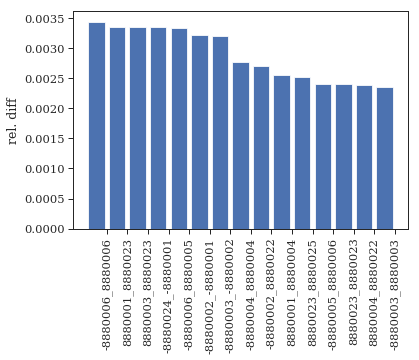

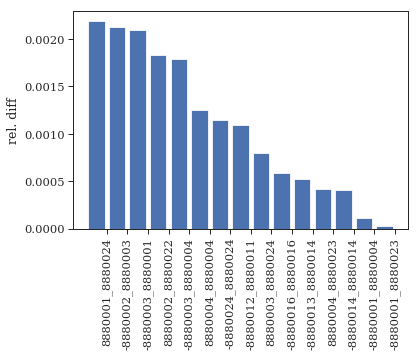

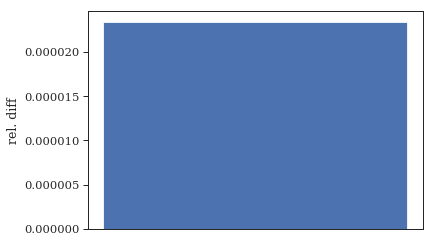

In [30]:
# now lets make a simple bar chart of the first 12 cross sections, in fb
# plt.figure(figsize=(20,10))
xsecDiffList = sorted([[pdg,2.*abs(xsecA[pdg]-xsecB[pdg])/(xsecA[pdg]+xsecB[pdg])] for pdg in xsecA], 
                       key = lambda pt: pt[1],reverse=True)
nproc = 0
nplot = 15
plt.figure()
while nproc < len(xsecDiffList):
    xsecDiff = dict(xsecDiffList[nproc:nproc+nplot])
    plt.bar(range(len(xsecDiff)), xsecDiff.values())
    plt.xticks(.5+ np.arange(len(xsecDiff)), xsecDiff.keys(), rotation="vertical" )
    plt.ylabel("rel. diff")
    nproc += nplot
    plt.show()